In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
df =pd.read_csv("C:/Users/user/Desktop/빅콘테스트/0918_umap_one_hot.csv")

In [6]:
df.head()

,STRG_DT,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2
0,2022/01/01 0:00,5.0,456,30.6,9.0,10.0,92.0,0,0.109357,1,0
1,2022/01/01 0:10,5.0,459,37.2,9.0,10.3,92.0,0,0.109357,1,0
2,2022/01/01 0:20,5.0,468,34.8,9.0,10.5,90.2,0,0.109357,1,0
3,2022/01/01 0:30,5.0,466,33.6,9.0,10.4,91.4,0,0.109357,1,0
4,2022/01/01 0:40,5.0,467,33.4,9.0,10.1,95.1,0,0.109357,1,0


In [7]:
y_0= df[["FRST_TREE_CNT"]]

In [8]:
#정규화 하기
x= df.drop(["FRST_TREE_CNT","cluster_1","cluster_2"],axis=1)
df_copy = x.copy()
df_copy['STRG_DT'] = pd.to_datetime(df_copy['STRG_DT'])

# 'Date' 열을 인덱스로 설정
df_copy.set_index('STRG_DT', inplace=True)

#standard scaler
scaler = StandardScaler()

# 데이터프레임의 모든 열에 Z-Score 정규화 적용
normalized_df = scaler.fit_transform(df_copy)
y= scaler.fit_transform(y_0)
# 정규화된 데이터를 다시 데이터프레임으로 변환(numpy array-> pandas dataframe)
normalized_df_ = pd.DataFrame(normalized_df, columns=df_copy.columns)
normalized_y_ = pd.DataFrame(y,columns=y_0.columns)
#normalized_df['STRG_DT'] = x['STRG_DT']

normalized_df_["cluster_2"] = df["cluster_2"]
normalized_df_["cluster_1"] = df["cluster_1"]

In [9]:
normalized_df_

,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_2,cluster_1
0,0.084880,0.914160,0.067609,-3.475634,0.348886,-0.801951,0.109357,0,1
1,0.120558,1.869452,0.067609,-3.425997,0.348886,-0.801951,0.109357,0,1
2,0.227592,1.522073,0.067609,-3.392906,0.229860,-0.801951,0.109357,0,1
3,0.203807,1.348384,0.067609,-3.409452,0.309210,-0.801951,0.109357,0,1
4,0.215699,1.319436,0.067609,-3.459089,0.553875,-0.801951,0.109357,0,1
...,...,...,...,...,...,...,...,...,...
26059,-0.331364,0.190455,-1.278816,-0.232676,0.289373,0.801733,-0.877973,0,1
26060,-0.331364,0.190455,-1.278816,-0.232676,0.315823,0.801733,-0.877973,0,1
26061,-0.307578,0.204929,-1.278816,-0.232676,0.335660,0.801733,-0.877973,0,1
26062,-0.260008,0.190455,-1.278816,-0.232676,0.362111,0.801733,-0.877973,0,1


In [10]:
normalized_y_

,FRST_TREE_CNT
0,0.278421
1,0.278421
2,0.278421
3,0.278421
4,0.278421
...,...
26059,-1.451028
26060,-1.451028
26061,-1.451028
26062,-1.451028


In [11]:
#최종
X= normalized_df_
y= normalized_y_.values

In [12]:
#모델에 넣을 form으로 바꾸기
y= y.flatten()


In [13]:
y

array([ 0.27842113,  0.27842113,  0.27842113, ..., -1.45102795,
       -1.45102795, -1.45102795])

In [14]:
# 모델 적용

In [18]:
# 3 kernel SVR models
svr_rbf = SVR(kernel="rbf", C= 1.0, gamma="scale", epsilon=0.1)
svr_lin = SVR(kernel="linear", C=1.0, epsilon=0.1)

svr_poly =SVR(kernel="poly",degree=3 , C=1.0, gamma="scale", epsilon=0.1)

models = [svr_rbf,svr_lin,svr_poly]
for svr in models:
    svr.fit(X, y)

# Metric for each model

for svr in models:
    y_pred = svr.predict(X)
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    print('Kernel: %s  Score: %.3f' % (svr.kernel, rmse))

# Kernel: rbf  Score: 44.902
# Kernel: linear  Score: 52.397
# Kernel: poly  Score: 48.031

Kernel: rbf  Score: 0.268
Kernel: linear  Score: 0.529
Kernel: poly  Score: 0.332


In [19]:

# Define SVR with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Parameters for grid search
params_linear = {'C': [0.01, 0.1, 1, 2,5], 'epsilon': [0.1, 0.2, 0.5,1]}

# Dictionary to store best models and their RMSE scores
best_models = {}
best_rmse = float('inf')



grid = GridSearchCV(svr_lin, param_grid=params_linear, cv=5, scoring='neg_mean_squared_error', verbose=1, return_train_score=True)

#  Fit the model
grid.fit(X, y)





Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [1]:
def daily_mean(y_pred, y_test):
    #예측값과 test 값을 일별로 평균내기
    df = pd.read_csv('C:/Users/user/Desktop/빅콘테스트/0916 착과수 최종.csv')
    new_df = pd.DataFrame()
    
    split_ratio = 0
    split_index = int(len(df) * split_ratio)

    new_df['STRG_DT'] = df.iloc[split_index:, :]['STRG_DT']
    new_df['y_test'] = y_test
    new_df['y_pred'] = y_pred

    new_df['STRG_DT'] = pd.to_datetime(new_df['STRG_DT'])


    # 'STRG_DT' 열을 인덱스로 설정
    new_df.set_index('STRG_DT', inplace=True)

    # 날짜별로 그룹화하고 평균을 계산
    daily_mean = new_df.groupby(new_df.index.date).mean()


    #역정규화
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_data = df['FRST_TREE_CNT'].values.reshape(-1, 1)  # 1D 데이터를 2D로 변환
    scaler.fit(scaled_data)
    
    
    

    # 이미 정규화된 y_pred 값을 역으로 변환합니다.
    daily_mean['y_pred'] = scaler.inverse_transform(np.array(daily_mean['y_pred']).reshape(-1,1))
    daily_mean['y_test'] = scaler.inverse_transform(np.array(daily_mean['y_test']).reshape(-1,1))

    #오차 계산
    daily_mean['error'] = daily_mean['y_test'] - daily_mean['y_pred']

    #그래프 계산
    plt.figure(figsize=(10,5))
    plt.plot(np.array(daily_mean['y_pred']),label = "pred")
    plt.plot(np.array(daily_mean['y_test']),label = "true")
    plt.legend()
    plt.show()


    #score 계산
    from sklearn.metrics import mean_squared_error, r2_score
    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(daily_mean['y_test'], daily_mean['y_pred']))

    # R^2 계산
    r_squared = r2_score(daily_mean['y_test'], daily_mean['y_pred'])

    # RMSE와 R^2 값을 리스트로 반환
    score = [rmse, r_squared]
    return daily_mean , score

In [20]:
# Get the best model and its RMSE score
#best_models[kernel] = grid.best_estimator_
best_lin_kernel = np.sqrt(-grid.best_score_)

print("Best RMSE:", best_lin_kernel)
print("Best parameters:", grid.best_params_)

Best RMSE: 0.8584211788415714
Best parameters: {'C': 0.01, 'epsilon': 1}


In [21]:
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y,grid.predict(X))))

RMSE for linear SVR: 0.5338561280890123


In [15]:
#svr_rbf = SVR(kernel="rbf", C= 1.0, gamma="scale", epsilon=0.1)
svr_lin = SVR(kernel="linear", C=0.01, epsilon=1)
svr_lin.fit(X, y)
#svr_poly =SVR(kernel="poly",degree=3 , C=1.0, gamma="scale", epsilon=0.1)


SVR(C=0.01, epsilon=1, kernel='linear')

In [19]:
y

array([ 0.27842113,  0.27842113,  0.27842113, ..., -1.45102795,
       -1.45102795, -1.45102795])

In [20]:
svr_lin.predict(X)

array([-0.2843645 , -0.33426953, -0.29529144, ..., -1.21436356,
       -1.2123237 , -1.21176377])

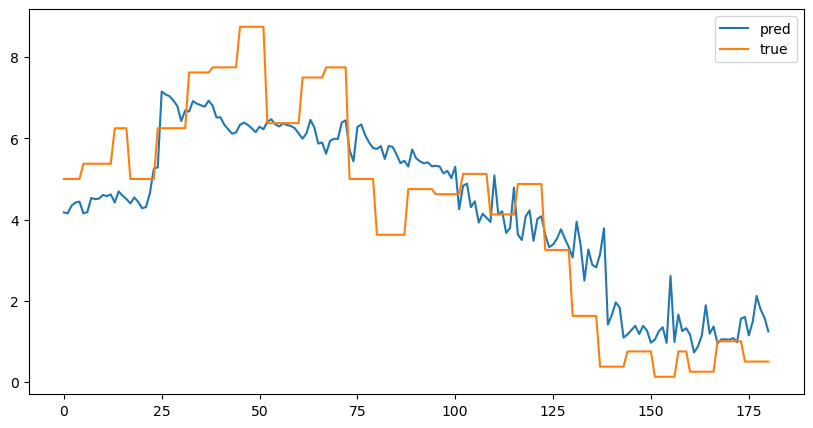

(            y_test    y_pred     error
 2022-01-01     5.0  4.175780  0.824220
 2022-01-02     5.0  4.152531  0.847469
 2022-01-03     5.0  4.344882  0.655118
 2022-01-04     5.0  4.419957  0.580043
 2022-01-05     5.0  4.441658  0.558342
 ...            ...       ...       ...
 2022-06-26     0.5  1.482332 -0.982332
 2022-06-27     0.5  2.116338 -1.616338
 2022-06-28     0.5  1.789512 -1.289512
 2022-06-29     0.5  1.583158 -1.083158
 2022-06-30     0.5  1.241187 -0.741187
 
 [181 rows x 3 columns],
 [1.178229274477364, 0.7949545449018594])

In [16]:
daily_mean(svr_lin.predict(X),y)

In [22]:
# 테스트 데이터에 대한 예측을 역정규화
scaler = StandardScaler()  # 스케일러 초기화 (이때, 적절한 초기화 방법을 사용하여 정의)
scaler.fit(y.reshape(-1, 1))  # y_train 데이터를 기반으로 스케일러를 초기화하고, 반드시 2D 배열로 변환해야 함

y_pred_inverse = scaler.inverse_transform(svr_lin.predict(X).reshape(-1,1))# 역정규화 수행
y_origin_inverse= scaler.inverse_transform(y.reshape(-1,1))


rmse = np.sqrt(mean_squared_error(y_pred_inverse,y_origin_inverse))
print("RMSE:", rmse)

RMSE: 0.5338561280890124


In [23]:
y_pred_inverse

array([[-0.2843645 ],
       [-0.33426953],
       [-0.29529144],
       ...,
       [-1.21436356],
       [-1.2123237 ],
       [-1.21176377]])

In [24]:
y_origin_inverse

array([[ 0.27842113],
       [ 0.27842113],
       [ 0.27842113],
       ...,
       [-1.45102795],
       [-1.45102795],
       [-1.45102795]])

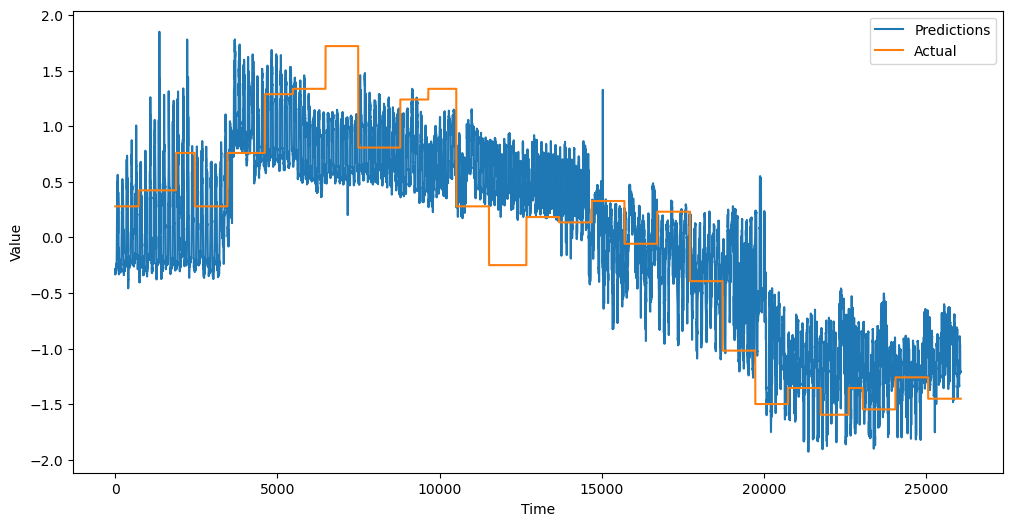

In [13]:

# 예측값과 실제값 시각화
plt.figure(figsize=(12, 6))
plt.plot( svr_lin.predict(X), label='Predictions')
plt.plot(y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [17]:
svr_rbf = SVR(kernel="rbf", C= 0.01, gamma="scale", epsilon=0.1)

In [19]:
svr_rbf.fit(X,y)

SVR(C=0.01)

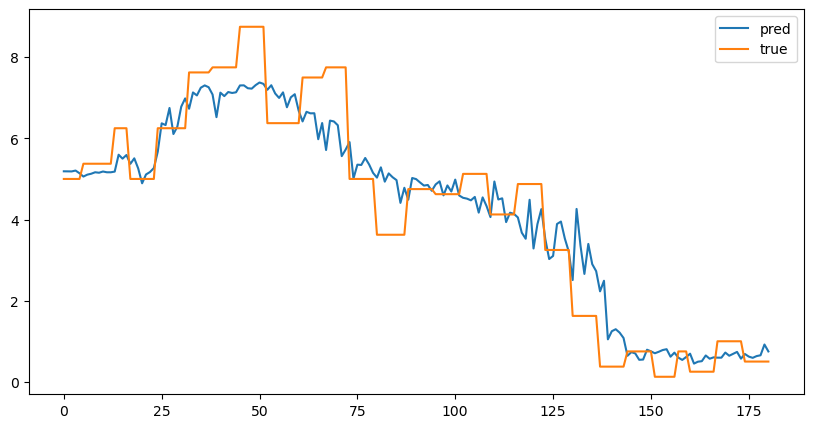

(            y_test    y_pred     error
 2022-01-01     5.0  5.188379 -0.188379
 2022-01-02     5.0  5.187951 -0.187951
 2022-01-03     5.0  5.185580 -0.185580
 2022-01-04     5.0  5.206935 -0.206935
 2022-01-05     5.0  5.140239 -0.140239
 ...            ...       ...       ...
 2022-06-26     0.5  0.591773 -0.091773
 2022-06-27     0.5  0.634971 -0.134971
 2022-06-28     0.5  0.654984 -0.154984
 2022-06-29     0.5  0.919985 -0.419985
 2022-06-30     0.5  0.749709 -0.249709
 
 [181 rows x 3 columns],
 [0.8102765145677645, 0.9030256154847223])

In [20]:
svr_rbf.fit(X,y)
daily_mean(svr_rbf.predict(X),y)

In [23]:
params_rbf = {'C': [0.01, 0.1, 1, 2,5], 'epsilon': [0.1, 0.2, 0.5,1]}

grid_2 = GridSearchCV(svr_rbf, param_grid=params_rbf, cv=5, scoring='neg_mean_squared_error', verbose=1, return_train_score=True)

#  Fit the model
grid_2.fit(X, y)

# Get the best model and its RMSE score
#best_models[kernel] = grid_2.best_estimator_
best_rmse_kernel = np.sqrt(-grid_2.best_score_)

print("Best RMSE:", best_rmse_kernel)
print("Best parameters:", grid_2.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RMSE: 0.657941420915697
Best parameters: {'C': 0.1, 'epsilon': 0.5}


In [24]:
print("RMSE for rbf SVR:",np.sqrt(mean_squared_error(y,grid_2.predict(X))))

RMSE for rbf SVR: 0.3520387090286718


In [15]:
svr_rbf = SVR(kernel="rbf", C= 0.1, gamma="scale", epsilon=0.5)
#svr_lin = SVR(kernel="linear", C=0.01, epsilon=1)
svr_rbf.fit(X, y)
#svr_poly =SVR(kernel="poly",degree=3 , C=1.0, gamma="scale", epsilon=0.1)

SVR(C=0.1, epsilon=0.5)

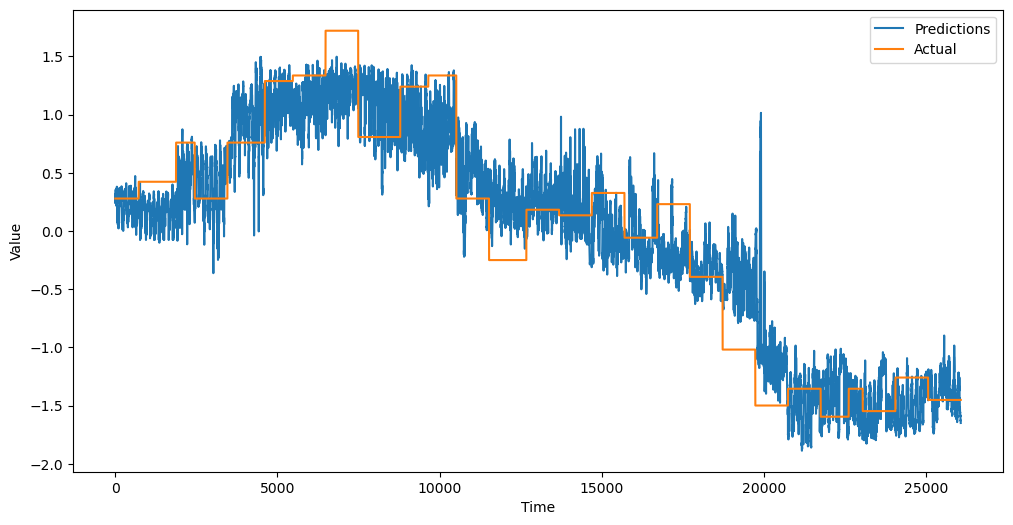

In [16]:
import matplotlib.pyplot as plt
#time= berry_1[["STRG_DT"]].values 
# 예측값과 실제값 시각화
plt.figure(figsize=(12, 6))
plt.plot( svr_rbf.predict(X), label='Predictions')
plt.plot(y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [30]:
params_poly = {'C': [0.01, 0.1, 1, 2,5], 'degree': [2,3,4] ,'epsilon': [0.1, 0.2, 0.5,1]}

grid_3 = GridSearchCV(svr_poly, param_grid=params_poly, cv=5, scoring='neg_mean_squared_error', verbose=1, return_train_score=True)

#  Fit the model
grid_3.fit(X, y)

# Get the best model and its RMSE score
#best_models[kernel] = grid_3.best_estimator_
best_rmse_kernel = np.sqrt(-grid_3.best_score_)

print("Best RMSE:", best_rmse_kernel)
print("Best parameters:", grid_3.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best RMSE: 0.8138648544173888
Best parameters: {'C': 0.1, 'degree': 2, 'epsilon': 1}


In [31]:
print("RMSE for poly SVR:",np.sqrt(mean_squared_error(y,grid_3.predict(X))))

RMSE for poly SVR: 0.5293266477582624


In [32]:
# 마지막 제일 좋은 rmse 가지는 것만 역정규화 해줄 것임.

In [ ]:
svr.fit(X, y)

In [21]:
#svr_rbf = SVR(kernel="rbf", C= 0.1, gamma="scale", epsilon=0.5)
#svr_lin = SVR(kernel="linear", C=0.01, epsilon=1)
#svr_rbf.fit(X, y)
svr_poly =SVR(kernel="poly",degree=2 , C=0.1, gamma="scale", epsilon=1)
svr_poly.fit(X, y)

SVR(C=0.1, degree=2, epsilon=1, kernel='poly')

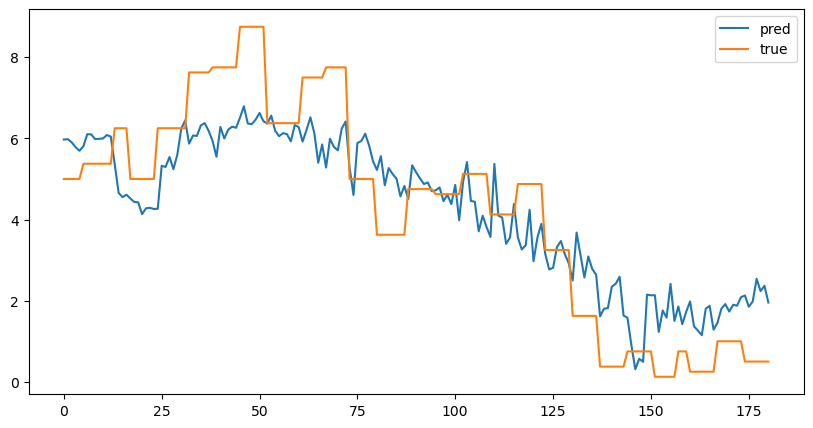

(            y_test    y_pred     error
 2022-01-01     5.0  5.971269 -0.971269
 2022-01-02     5.0  5.979560 -0.979560
 2022-01-03     5.0  5.902787 -0.902787
 2022-01-04     5.0  5.784562 -0.784562
 2022-01-05     5.0  5.694709 -0.694709
 ...            ...       ...       ...
 2022-06-26     0.5  1.980188 -1.480188
 2022-06-27     0.5  2.539496 -2.039496
 2022-06-28     0.5  2.235558 -1.735558
 2022-06-29     0.5  2.368284 -1.868284
 2022-06-30     0.5  1.955362 -1.455362
 
 [181 rows x 3 columns],
 [1.2228472191729982, 0.7791309161114465])

In [22]:
daily_mean(svr_poly.predict(X),y)

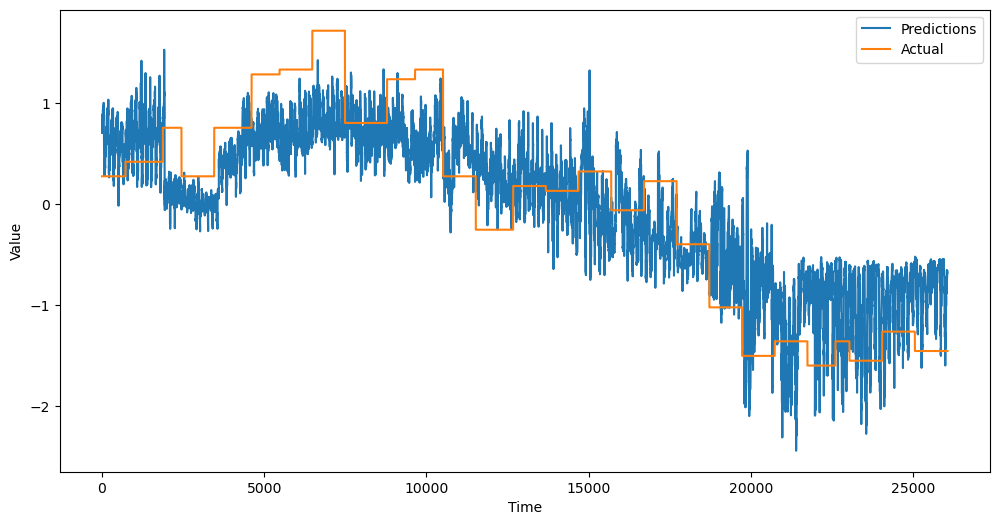

In [18]:

# 예측값과 실제값 시각화
plt.figure(figsize=(12, 6))
plt.plot( svr_poly.predict(X), label='Predictions')
plt.plot(y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
